In [2]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Second Feature')

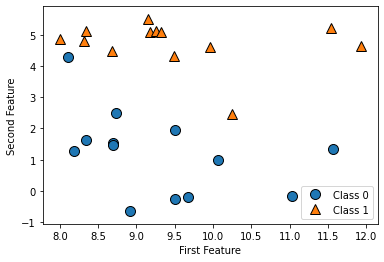

In [27]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[: ,0], X[: ,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")

Score of regressor:
0.8344172446249605


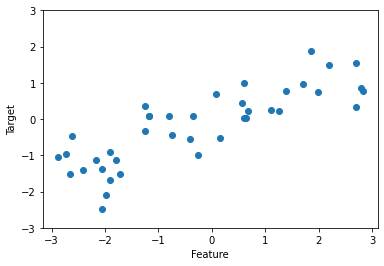

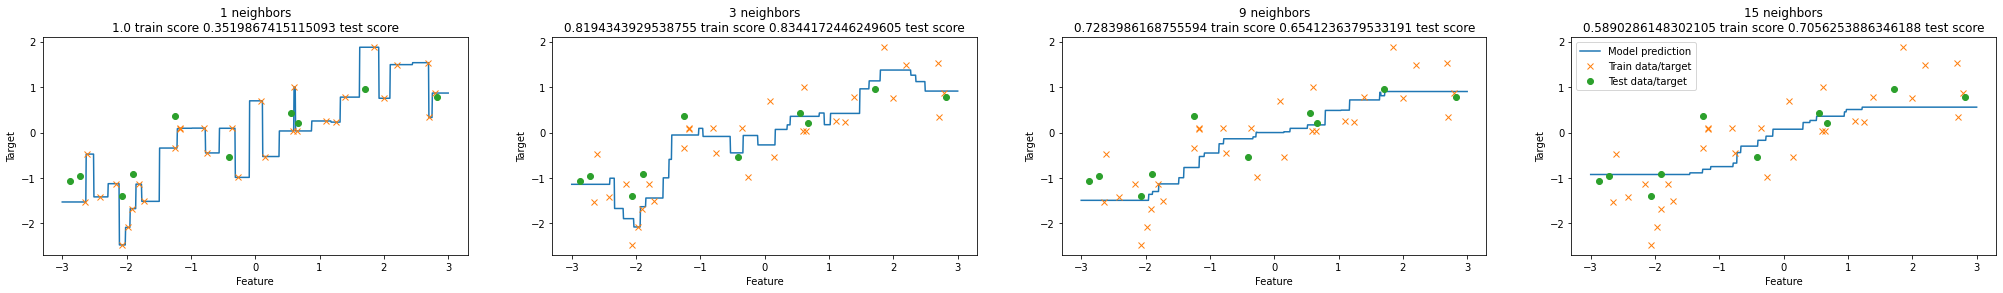

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("Score of regressor:\n{}".format(reg.score(X_test, y_test)))

fig, axes = plt.subplots(1, 4, figsize=(35, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9, 15], axes):
    reg = KNeighborsRegressor(n_neighbors).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, 'x')
    ax.plot(X_test, y_test, 'o')
    ax.set_title("{} neighbors\n{} train score {} test score".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test))
        )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
ax.legend(["Model prediction", "Train data/target", "Test data/target"], loc="best")
    

Keys of cancer dataset
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Sample dataset:
{'malignant': 212, 'benign': 357}
Features
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


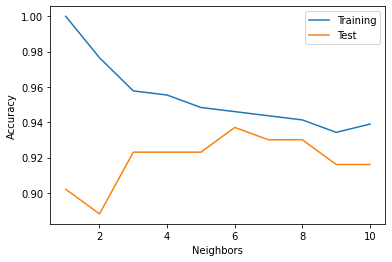

In [56]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
cancer = load_breast_cancer()
print("Keys of cancer dataset\n{}".format(cancer.keys()))
print("Sample dataset:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("Features\n{}".format(cancer.feature_names))

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

# print(X_train)
# fig, axes = plt.subplots(1, 10, figsize=(20, 3))
# for n_neighbors, ax in zip(range(1, 11), axes):
#     clf = KNeighborsClassifier(n_neighbors).fit(X_train, y_train)
#     mglearn.plots.plot_2d_separator(clf, X_train, fill=True, eps=0.6, ax=ax, alpha=0.4)
#     mglearn.discrete_scatter(X_train[: ,0], X_train[: ,1], X_train[: ,2], X_train[: ,3], X_train[: ,4],
#                              X_train[: ,5], X_train[: ,6], X_train[: ,7], X_train[: ,8], X_train[: ,9], 
#                              X_train[: ,10], X_train[: ,11], X_train[: ,12], X_train[: ,13], X_train[: ,14], 
#                              X_train[: ,15], X_train[: ,16], X_train[: ,17], X_train[: ,18], X_train[: ,19], 
#                              X_train[: ,20], X_train[: ,21], X_train[: ,22], X_train[: ,23], X_train[: ,24], 
#                              X_train[: ,25], X_train[: ,26], X_train[: ,27], X_train[: ,28], X_train[: ,29], y_train, ax=ax)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="Training")
plt.plot(neighbors_settings, test_accuracy, label="Test")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()

In [52]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Boston dataset\n{}".format(boston.keys()))
print("Boston data\n{}".format(boston.feature_names))

Boston dataset
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
Boston data
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [55]:
X_boston_ext, y_boston_ext = mglearn.datasets.load_extended_boston()
print(X_boston_ext.shape)

(506, 104)


c:\python\miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
 

c:\python\miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


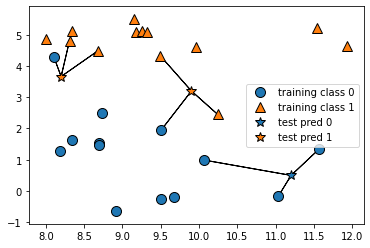

In [62]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [71]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("Prediction\n{}".format(clf.predict(X_test)))
print("Accuracy\n{}".format(np.mean(y_test == clf.predict(X_test))))

Prediction
[1 0 1 0 1 0 0]
Accuracy
0.8571428571428571


c:\python\miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


c:\python\miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


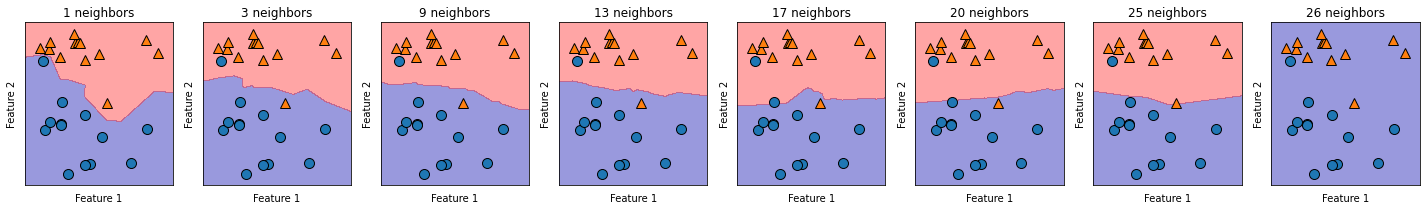

In [50]:
from sklearn.neighbors import KNeighborsClassifier
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 8, figsize=(25, 3))#10, 3 inside figsize represents 10 * 72 pixels, 3 * 72 pixels
for n_neighbors, ax in zip([1, 3, 9, 13, 17, 20, 25, 26], axes):
    #the fit method returns object self, so we can instantiate
    #and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[: ,0], X[: ,1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

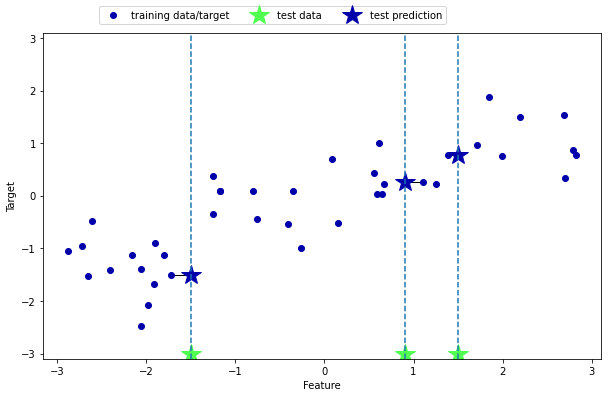

In [57]:
mglearn.plots.plot_knn_regression(n_neighbors=1)